/home/csimmon2/anaconda3/envs/brainiak_env/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()


Calculating global scale...
Global value range: -11.60 to 17.42
Using scale: -17.42 to 17.42
Using threshold: 4.00

Processing pIPS_right...
Group average saved to: group_average_tool_pIPS_right.nii.gz


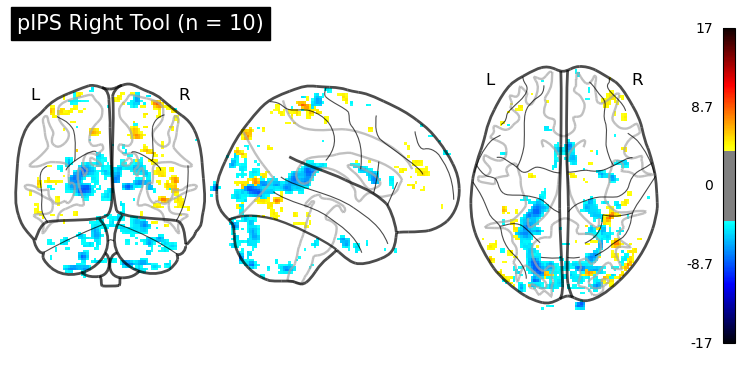


Processing pIPS_left...
Group average saved to: group_average_tool_pIPS_left.nii.gz


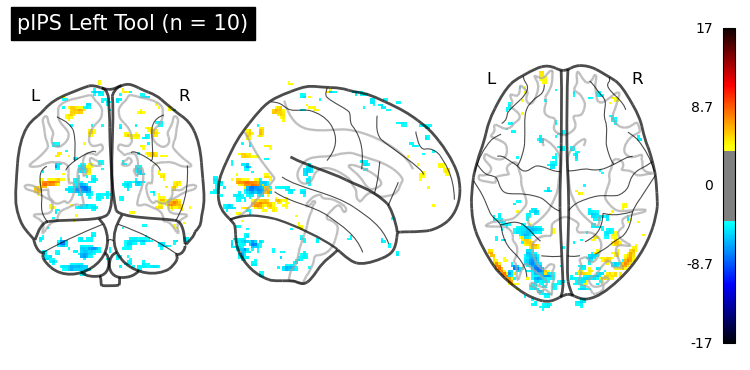


Processing LO_right...
Group average saved to: group_average_tool_LO_right.nii.gz


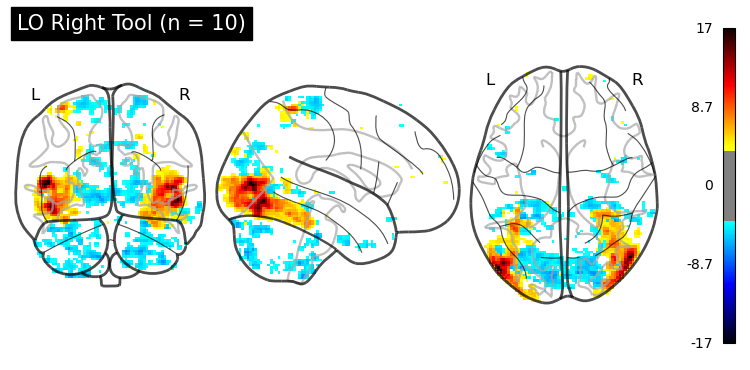


Processing LO_left...
Group average saved to: group_average_tool_LO_left.nii.gz


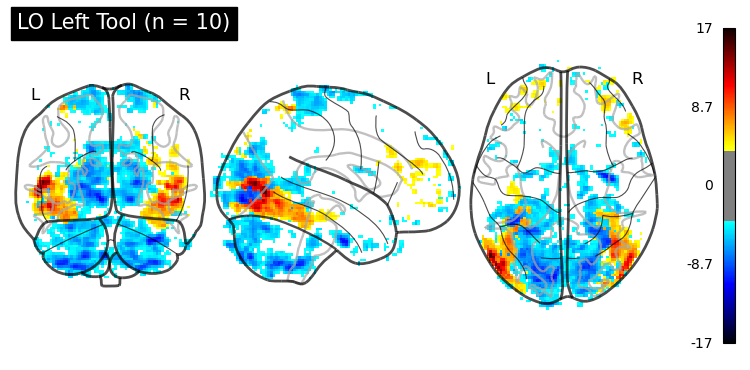


Processing complete.


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)  # Updated regex pattern
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni.nii.gz'  # Updated pattern
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_tool_{region}.nii.gz'  # Updated filename
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title: split the region name and format it nicely
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"  # Added 'Tool'

    # Display the average image with consistent scaling
    plotting.plot_glass_brain(avg_img, threshold=threshold, colorbar=True, 
                            plot_abs=False, vmin=vmin, vmax=vmax,
                            title=title)
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO_right', 'LO_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -25, 25

# Set threshold as a percentage of the maximum value (e.g., 10%)
#threshold = 0.1 * sym_max 
threshold = 4

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni.nii.gz'  # Updated pattern
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

Calculating global scale...
Global value range: -15.54 to 13.59
Using scale: -15.54 to 15.54
Using threshold: 4.00

Processing pIPS_right...
Group average saved to: group_average_tool_pIPS_right_1217.nii.gz


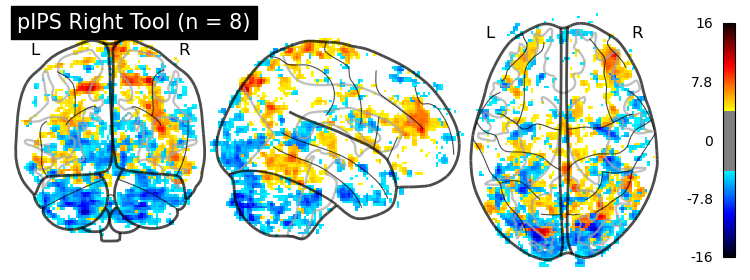


Processing pIPS_left...
Group average saved to: group_average_tool_pIPS_left_1217.nii.gz


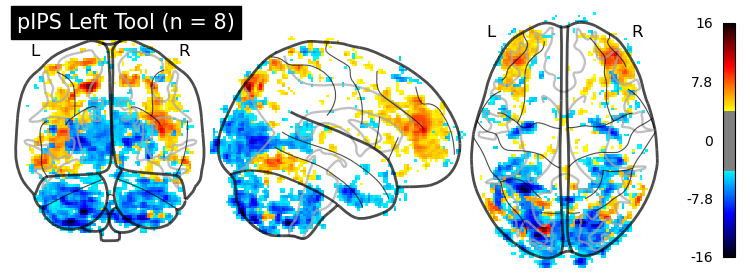


Processing complete.


In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def load_and_average(file_pattern):
    """Helper function to load and average files"""
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return None, None, []
    
    # Extract and sort subject numbers
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)  # Updated regex pattern
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    
    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return None, None, []
    
    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def find_global_scale(base_path, regions):
    """Find global min and max values across all group averages"""
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'  # Updated pattern
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average(file_pattern, region, vmin, vmax, threshold):
    # Load and average data
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
    
    # Save the average image
    output_path = f'group_average_tool_{region}_1217.nii.gz'  # Updated filename
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Format the title: split the region name and format it nicely
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"  # Added 'Tool'

    # Display the average image with consistent scaling
    plotting.plot_glass_brain(avg_img, threshold=threshold, colorbar=True, 
                            plot_abs=False, vmin=vmin, vmax=vmax,
                            title=title)
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left']

# First find global min and max
print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

# Set symmetric limits based on the absolute maximum value
sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max
##to manually set the scales replace the above line with the following line
#vmin, vmax = -25, 25

# Set threshold as a percentage of the maximum value (e.g., 10%)
#threshold = 0.1 * sym_max 
threshold = 4

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
    group_average(file_pattern, region, vmin=vmin, vmax=vmax, threshold=threshold)

print("\nProcessing complete.")

Calculating global scale...


Global value range: -15.54 to 13.59
Using scale: -15.54 to 15.54
Using threshold: 4.00
Using minimum cluster size: 30

Processing pIPS_right...


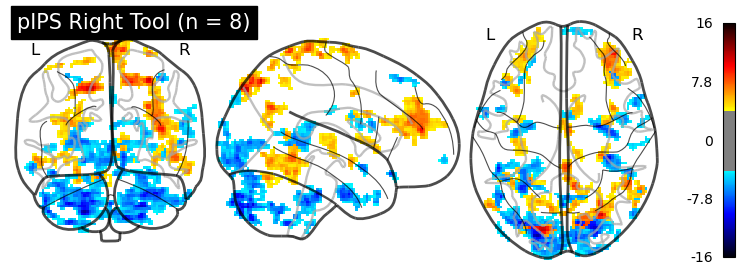


Processing pIPS_left...


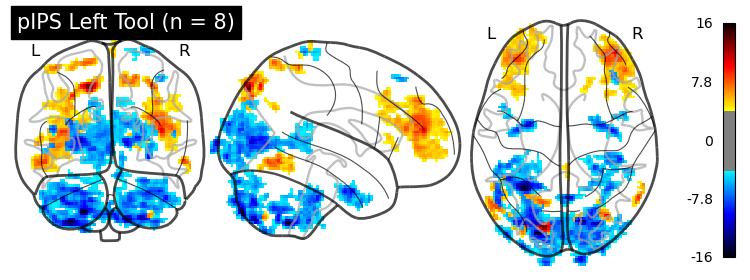


Processing complete.


In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
from scipy import ndimage
import glob
import os
import re

def load_and_average(file_pattern):
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching pattern: {file_pattern}")
        return None, None, []
    
    subject_files = {}
    for f in files:
        match = re.search(r'sub-spaceloc(\d+)', f)
        if match:
            subject_files[match.group(1)] = f
    
    sorted_subjects = sorted(subject_files.keys(), key=int)
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    if len(set([img.shape for img in images])) > 1:
        print("Error: Not all images have same shape.")
        return None, None, []
    
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)
    
    return avg_data, avg_img, sorted_subjects

def apply_cluster_threshold(img, min_cluster_size=10):
    data = img.get_fdata()
    pos_mask = data > threshold
    neg_mask = data < -threshold
    
    pos_labels, _ = ndimage.label(pos_mask)
    neg_labels, _ = ndimage.label(neg_mask)
    
    for labels in [pos_labels, neg_labels]:
        for label in range(1, labels.max() + 1):
            if np.sum(labels == label) < min_cluster_size:
                mask = labels == label
                data[mask] = 0
    
    return nib.Nifti1Image(data, img.affine, img.header)

def find_global_scale(base_path, regions):
    all_averages = []
    
    for region in regions:
        file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
        avg_data, _, _ = load_and_average(file_pattern)
        if avg_data is not None:
            all_averages.append(avg_data)
    
    if all_averages:
        global_min = min(np.min(avg) for avg in all_averages)
        global_max = max(np.max(avg) for avg in all_averages)
        return global_min, global_max
    return None, None

def group_average_clustered(file_pattern, region, vmin, vmax, threshold, min_cluster_size):
    avg_data, avg_img, sorted_subjects = load_and_average(file_pattern)
    
    if avg_img is None:
        return
        
    # Apply cluster thresholding
    clustered_img = apply_cluster_threshold(avg_img, min_cluster_size)
    
    region_parts = region.split('_')
    if len(region_parts) == 2:
        title = f"{region_parts[0]} {region_parts[1].capitalize()} Tool (n = {len(sorted_subjects)})"
    
    plotting.plot_glass_brain(clustered_img, threshold=threshold, colorbar=True, 
                            plot_abs=False, vmin=vmin, vmax=vmax,
                            title=title)
    plt.show()

# Base path and parameters
base_path = '/lab_data/behrmannlab/vlad/ptoc'
regions = ['pIPS_right', 'pIPS_left']
min_cluster_size = 30  # Adjust this value
threshold = 4.0        # Adjust this value

print("Calculating global scale...")
global_min, global_max = find_global_scale(base_path, regions)
print(f"Global value range: {global_min:.2f} to {global_max:.2f}")

sym_max = max(abs(global_min), abs(global_max))
vmin, vmax = -sym_max, sym_max

print(f"Using scale: {vmin:.2f} to {vmax:.2f}")
print(f"Using threshold: {threshold:.2f}")
print(f"Using minimum cluster size: {min_cluster_size}")

for region in regions:
    print(f"\nProcessing {region}...")
    file_pattern = f'{base_path}/sub-spaceloc*/ses-01/derivatives/gca/combined_tool_{region}_mni_1217.nii.gz'
    group_average_clustered(file_pattern, region, vmin=vmin, vmax=vmax, 
                          threshold=threshold, min_cluster_size=min_cluster_size)

print("\nProcessing complete.")